In [111]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv


In [112]:
df=pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/car data.csv')
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [113]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [114]:
df.shape

(301, 9)

In [115]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [116]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [117]:
df['Owner'].unique()

array([0, 1, 3])

In [118]:
#unique values using for loop
for i in ['Seller_Type','Transmission','Owner','Fuel_Type']:
    print(df[i].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [119]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [120]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [121]:
final_dataset=df[['Year','Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
final_dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [122]:
final_dataset['Current_year']=2020

In [123]:
final_dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2020
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2020
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2020
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2020


In [124]:
final_dataset.dtypes

Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
Current_year       int64
dtype: object

In [125]:
#We calculated  the diffence between the current year and Year 
final_dataset['Actual_year']=final_dataset['Current_year']-final_dataset['Year']
final_dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,Actual_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2020,4
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2020,5
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2020,11
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2020,3


In [126]:
final_dataset.drop(['Year','Current_year'],axis=1,inplace=True)
final_dataset

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Actual_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


In [141]:
#dummy creation
final_dataset=pd.get_dummies(final_dataset,drop_first=True)
final_dataset

,Selling_Price,Present_Price,Kms_Driven,Owner,Actual_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,1,0,0,1
297,4.00,5.90,60000,0,5,0,1,0,1
298,3.35,11.00,87934,0,11,0,1,0,1
299,11.50,12.50,9000,0,3,1,0,0,1


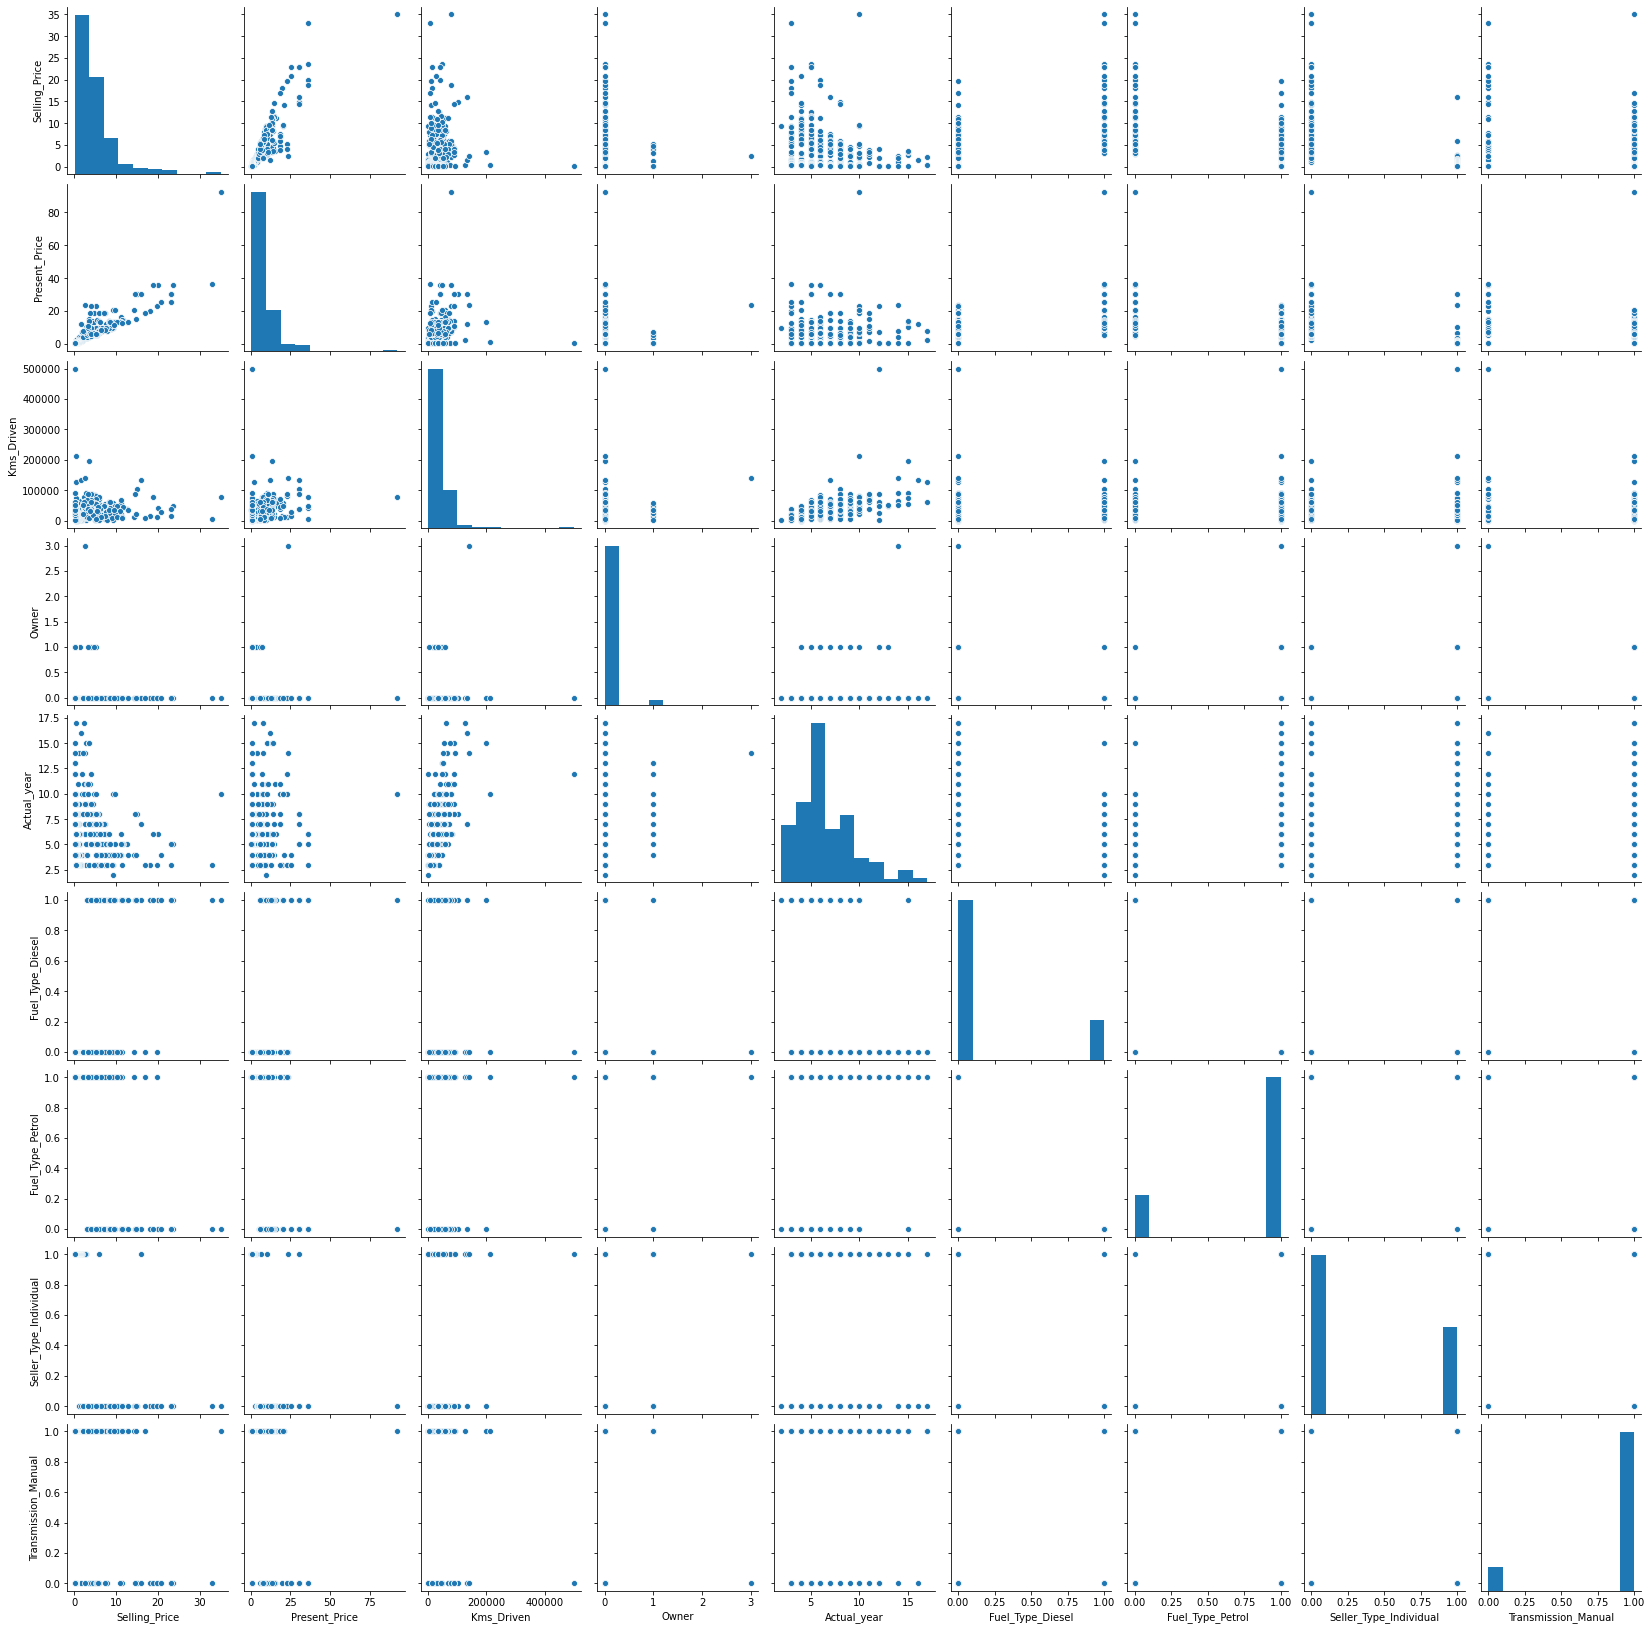

In [142]:
#find corelation
import seaborn as sns 
sns.pairplot(final_dataset)

******

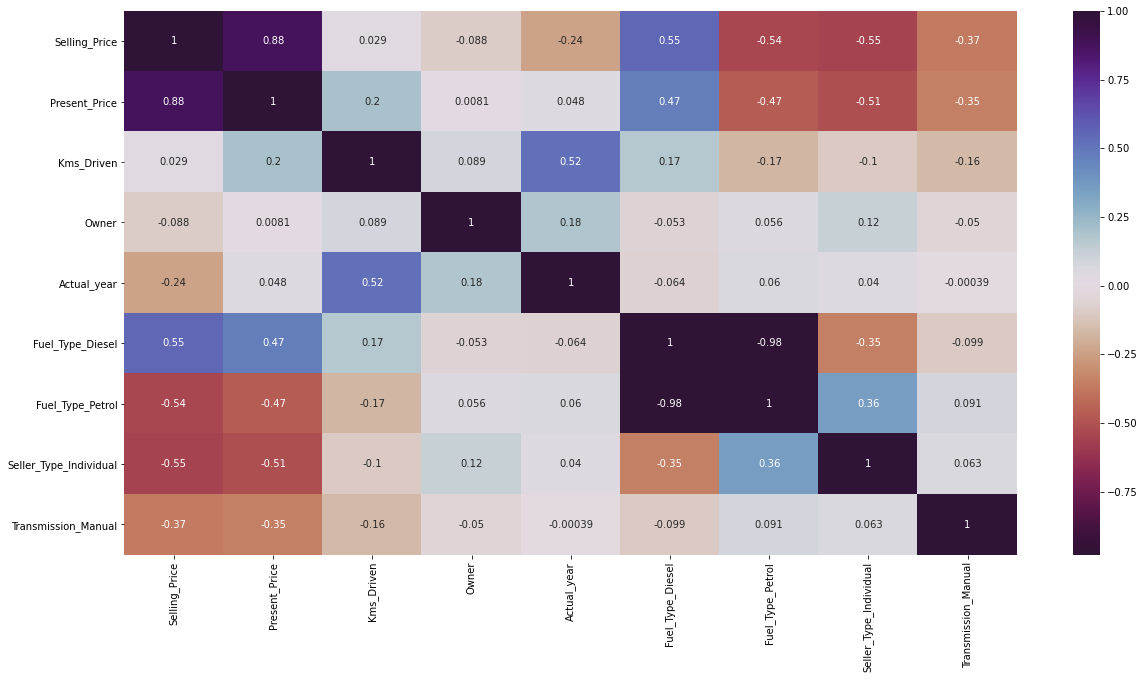

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline
cormap=final_dataset.corr()
topcorr=cormap.index
plt.figure(figsize=(20,10))
#plot heatmap
g=sns.heatmap(final_dataset[topcorr].corr(),annot=True,cmap='twilight_shifted_r')

In [144]:
final_dataset.head(10)

,Selling_Price,Present_Price,Kms_Driven,Owner,Actual_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1
5,9.25,9.83,2071,0,2,1,0,0,1
6,6.75,8.12,18796,0,5,0,1,0,1
7,6.50,8.61,33429,0,5,1,0,0,1
8,8.75,8.89,20273,0,4,1,0,0,1
9,7.45,8.92,42367,0,5,1,0,0,1


In [145]:
#feature_selection
X=final_dataset.iloc[:,1:]
X

,Present_Price,Kms_Driven,Owner,Actual_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,4,1,0,0,1
297,5.90,60000,0,5,0,1,0,1
298,11.00,87934,0,11,0,1,0,1
299,12.50,9000,0,3,1,0,0,1


In [146]:
y=final_dataset.iloc[:,0]
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [147]:
final_dataset.dtypes


Selling_Price             float64
Present_Price             float64
Kms_Driven                  int64
Owner                       int64
Actual_year                 int64
Fuel_Type_Diesel            uint8
Fuel_Type_Petrol            uint8
Seller_Type_Individual      uint8
Transmission_Manual         uint8
dtype: object

In [148]:
###feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [151]:
print(model.feature_importances_)

[0.38973144 0.04167328 0.00040068 0.07541357 0.21269841 0.01019478
 0.13481933 0.13506851]


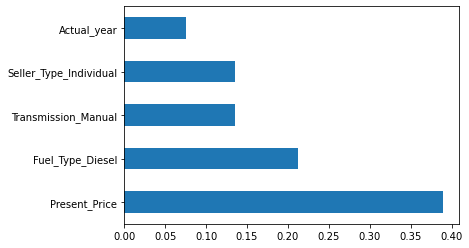

In [152]:
#plot feature importances
fea_imp=pd.Series(model.feature_importances_,index=X.columns)
fea_imp.nlargest(5).plot(kind='barh')
plt.show()

In [153]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=20)

In [158]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg

LinearRegression()

In [159]:
reg.fit(X_train,y_train)

LinearRegression()

In [160]:
print(X_test)

     Present_Price  Kms_Driven  Owner  Actual_year  Fuel_Type_Diesel  \
211          14.79       43535      0            5                 1   
298          11.00       87934      0           11                 0   
28            3.95       44542      0           10                 0   
286           7.90       28569      0            4                 0   
132           0.95        3500      0            3                 0   
..             ...         ...    ...          ...               ...   
189           0.57       55000      0           15                 0   
24            4.41       56879      0            7                 0   
300           5.90        5464      0            4                 0   
236           4.43       11849      0            4                 0   
206           7.13       12479      0            3                 0   

     Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
211                 0                       0                    1

In [161]:
print(y_test)

211    11.75
298     3.35
28      1.95
286     5.65
132     0.75
       ...  
189     0.20
24      2.90
300     5.30
236     3.10
206     5.75
Name: Selling_Price, Length: 61, dtype: float64


In [162]:
y_pred=reg.predict(X_test)
y_pred

array([ 9.97986101,  3.83338508,  1.44269414,  5.7630766 ,  2.15879688,
        0.86332431,  9.00152096,  2.61031395,  5.18723673,  9.0661462 ,
       -1.45573426,  2.34072887,  1.5006149 ,  6.41596038,  5.75940421,
        4.54569708,  4.33076363,  4.69805967,  7.33576044,  0.88724317,
       -0.47151968, 18.14536803,  5.22651089, 19.82891864,  4.36385445,
        4.21280733,  9.49686181,  0.17412689,  1.67335243, -0.26382635,
       15.60125157,  1.12952971,  0.65700913,  7.2930202 ,  4.06738294,
        9.43436176,  6.23648842,  7.35341669,  2.08651157,  8.25238036,
        2.84933043,  6.76864713, -1.01754482,  6.41562591,  1.61570899,
        2.38126283,  6.6280995 ,  3.40951895,  4.69747222, 20.42934268,
        2.51657548,  9.06789398,  8.05468038,  5.95300445,  6.22109347,
        3.93174384, -3.32866536,  2.82508017,  5.02961185,  4.35324508,
        5.94127204])

In [169]:
reg.score(X_test, y_test)

ValueError: continuous is not supported